In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# List contents of your Drive
os.listdir('/content/drive/MyDrive/')


['MekalaManjula_Resume_20250129_090722_0000.pdf',
 'Colab Notebooks',
 'R200582_16_Self Intro.mp4',
 'Manjula.pdf',
 'deepfake_dataset']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 256
BATCH_SIZE = 32


In [5]:
DATASET_PATH = '/content/drive/MyDrive/deepfake_dataset'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 2642 images belonging to 2 classes.


In [7]:
val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 660 images belonging to 2 classes.


In [8]:
# Build the model
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [9]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]


In [11]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9392 - loss: 0.2096 

83/83 ━━━━━━━━━━━━━━━━━━━━ 1975s 22s/step - accuracy: 0.9397 - loss: 0.2081 - val_accuracy: 0.6879 - val_loss: 1.3344
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 461ms/step - accuracy: 0.9970 - loss: 0.0057 - val_accuracy: 0.6879 - val_loss: 1.7841
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - accuracy: 1.0000 - loss: 8.4612e-04 - val_accuracy: 0.6879 - val_loss: 1.7739
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 1.0000 - loss: 6.2601e-04

83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 1.0000 - loss: 6.2443e-04 - val_accuracy: 0.6939 - val_loss: 0.9698
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 1.0000 - loss: 2.4857e-04

83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 481ms/step - accuracy: 1.0000 - loss: 2.5119e-04 - val_accuracy: 0.9318 - val_loss: 0.1450
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 1.9393e-04

83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 479ms/step - accuracy: 1.0000 - loss: 1.9404e-04 - val_accuracy: 0.9939 - val_loss: 0.0168
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 1.0000 - loss: 1.7274e-04

83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 1.0000 - loss: 1.7269e-04 - val_accuracy: 0.9985 - val_loss: 0.0045
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - accuracy: 1.0000 - loss: 1.1594e-04 - val_accuracy: 0.8076 - val_loss: 0.5036
Epoch 9/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 458ms/step - accuracy: 1.0000 - loss: 1.5187e-04 - val_accuracy: 0.6894 - val_loss: 1.6165
Epoch 10/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 459ms/step - accuracy: 1.0000 - loss: 2.8529e-04 - val_accuracy: 0.9939 - val_loss: 0.0244


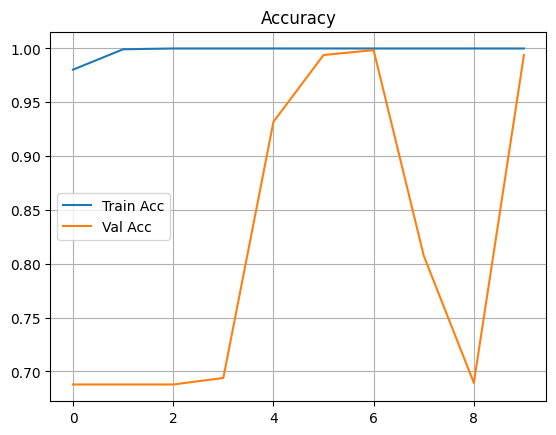

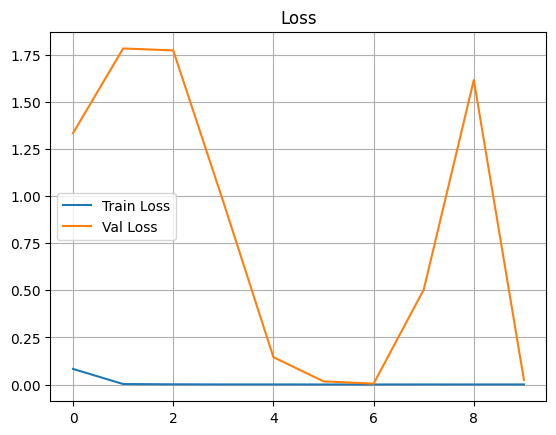

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.grid(True)
plt.show()

In [14]:
model.save('/content/drive/MyDrive/my_model.keras')

